In [1]:
#import modules
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#combine datasets into 1 dataframe
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
df = pd.concat([train_df, test_df], sort=False)

In [3]:
#condense to only neccessary columns & get rid of empty rows
df = df.dropna()
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
1,1.0,1,female,38.0,1,71.2833,C
3,1.0,1,female,35.0,1,53.1000,S
6,0.0,1,male,54.0,0,51.8625,S
10,1.0,3,female,4.0,1,16.7000,S
11,1.0,1,female,58.0,0,26.5500,S


In [4]:
le = LabelEncoder()

df[['Sex', 'Embarked']] = df[['Sex', 'Embarked']].apply(le.fit_transform)
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']].values.astype(np.float32)
y = df['Survived'].values.astype(np.float32).reshape(-1, 1)

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

In [8]:
class RegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(6, 1)
        
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred

In [9]:
model = RegressionModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [10]:
epochs = 1000

In [25]:
for i in range(epochs):
    model.train()
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)

    #print('epoch: ', i, 'loss: ', loss.item())

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)
    print('loss: ', np.round((loss.item() * 100)), '%')

loss:  97.0 %


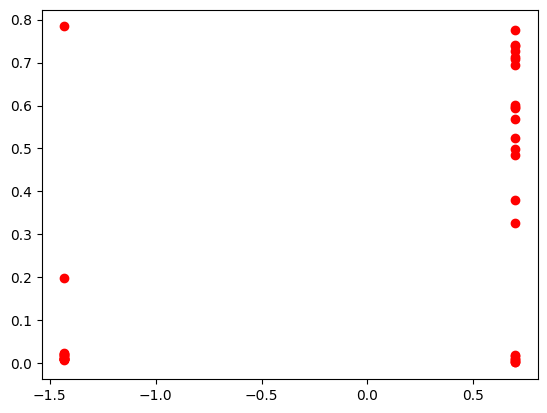

In [12]:
#test the model
